<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Betsy Torres | Karla Antón

**Fecha:** 12 noviembre de 2020.

**Expediente** : if714095 | if714572
**Profesor:** Oscar David Jaramillo Zuluaga.

# Proyecto Modulo 1

### 1.1 Titulo del Trabajo

## <span style="background-color: YELLOW"> MUERTES POR SUICIDIO EN MÉXICO




### 1.2 Objetivos.

**Objetivo general**

> Analizar el aumento de defunciones, especificamente a causa de suicidios, en México.

**Objetivos específicos**

Utilizando las bases de datos de inegi, estos son los puntos de interés:
> - Verificar el comportamiento del índice de mortalidad.
> - simular los comportamientos de los suicidios y como afetan al indice de mortalidad.
> - Simular los comportamientos las edades en las que ocurre más el suicido.
> - Encontrar como los sucidios influyen en la tasa de mortalidad

### 1.3 Definición del problema




### 1.4 Nodos y variables que se decidieron simular 

> - Defunciones
> - Defunciones según accidente
> - Sucidio según sus causas
> - Sucidio según la edad
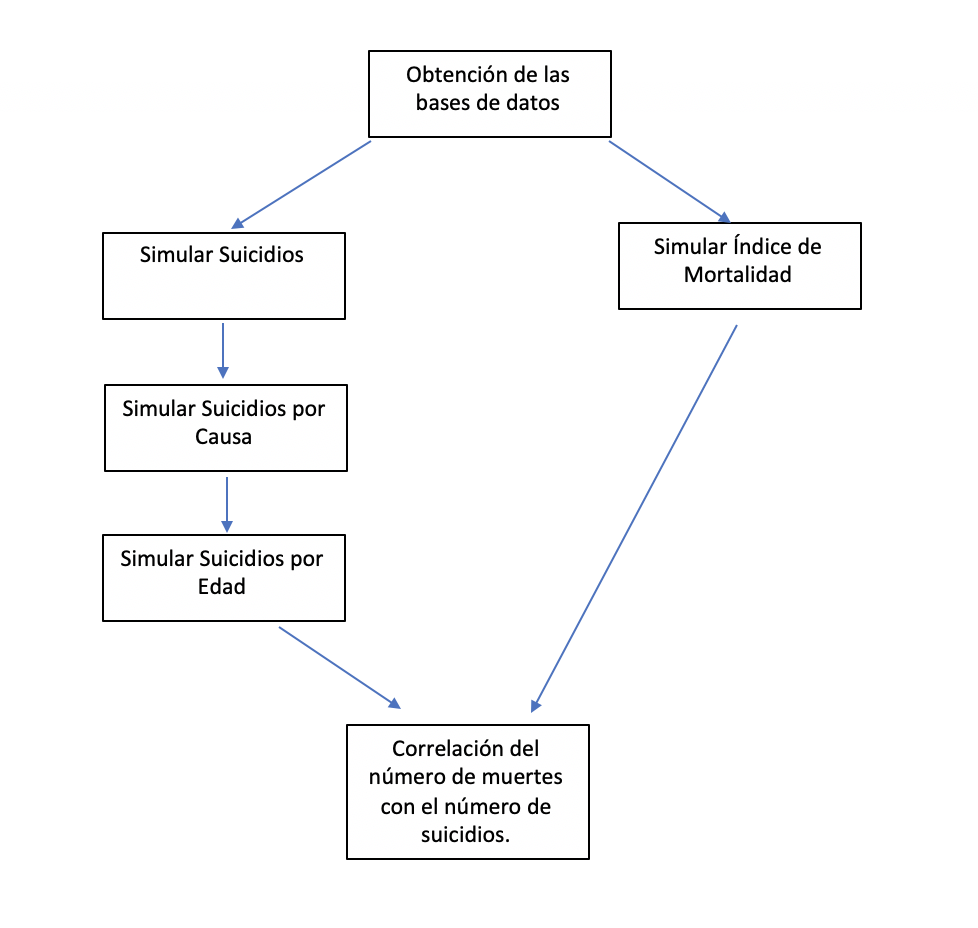

### 1.5 Definición de hipótesis y supuestos.
**Supuestos**
> - Las muertes en México seguirán aumentando 
> - Los datos serán suficientes para resultados concluyentes

**Hipótesis**


### 1.6 Obtención de bases de datos
> Bases de datos obtenidas de <https://www.inegi.org.mx>


In [1]:
# Importamos librerías 
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd
from scipy import optimize
# import pandas as pd 
# import matplotlib.pyplot as plt 
# import numpy as np
# import scipy.stats as st 
# from scipy import optimize as opt 
# from sklearn.neighbors import KernelDensity
# from scipy.stats.distributions import norm
# from sklearn.model_selection import GridSearchCV

In [2]:
suicidios = pd.read_excel('Suicidios_Estados.xlsx', sheet_name='Tabulado', header=None).dropna()
suicidios = suicidios.drop(columns=[2,3,4,6,7,8,10,11,12])
suicidios.columns=['Estados','2017','2018','2019']
suicidios.set_index('Estados', inplace=True)
suicidios['Total'] = suicidios.iloc[:,0:3].sum(axis=1) #total suicidios por estado y total de totales por año
# suicidios['2017']=suicidios.iloc[:,1].astype('int64')
# suicidios['2018']=suicidios.iloc[:,2].astype('int64')
# suicidios['2019']=suicidios.iloc[:,3].astype('int64')
suicidios.head()

,2017,2018,2019,Total
Estados,,,,
Total,6559,6808,7223,20590.0
Aguascalientes,140,140,157,437.0
Baja California,166,194,169,529.0
Baja California Sur,47,57,59,163.0
Campeche,74,69,95,238.0


In [3]:
mort = pd.read_excel('Mortalidad.xlsx', sheet_name='Tabulado', header=None).dropna()
mort = mort.drop(columns=[2,3,4,6,7,8,10,11,12])
mort.columns=['Estados','2017','2018','2019']
mort.set_index('Estados', inplace=True)
mort['Total'] = mort.iloc[:,0:3].sum(axis=1)
mort.head()

,2017,2018,2019,Total
Estados,,,,
Total,703047,722611,747784,2173442.0
Aguascalientes,6158,6226,6768,19152.0
Baja California,19073,20501,20924,60498.0
Baja California Sur,3826,3447,3556,10829.0
Campeche,4631,4835,5121,14587.0


In [4]:
causas = pd.read_excel('Suicidios_Causas2.xlsx', sheet_name='Tabulado', header=None).dropna()
causas = causas.drop(columns=[2,3,5,6,8,9,11,12,14,15,17,18,20,21,23,24,26,27])
causas.columns=['Causas','2010','2011','2012','2013','2014','2015','2016','2017','2018']
causas.set_index('Causas', inplace=True)
causas['Total'] = causas.iloc[:,0:3].sum(axis=1)
# s_causa.head()
causas


,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Causas,,,,,,,,,,
Total,5012,5718,5549,5909,6337,6425,6370,6559,6808,16279.0
"Ahorcamiento, estrangulamiento o sofocación",3847,4406,4291,4554,5000,5092,5145,5266,5486,12544.0
Disparo de arma de fuego,547,595,524,574,529,573,491,518,515,1666.0
Envenenamiento,460,523,508,556,577,512,517,517,506,1491.0
Otras causas,158,194,226,225,231,248,217,258,301,578.0


In [5]:
edad = pd.read_excel('Suicidios_Edad.xlsx', sheet_name='Tabulado', header=None).dropna()
edad = edad.drop(columns=[2,3,5,6,8,9,11,12,14,15,17,18,20,21,23,24,26,27])
edad.columns=['Edad','2010','2011','2012','2013','2014','2015','2016','2017','2018']
edad.set_index('Edad', inplace=True)
edad['Total'] = edad.iloc[:,0:3].sum(axis=1)
edad

,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Edad,,,,,,,,,,
Total,5012,5718,5549,5909,6337,6425,6370,6559,6808,16279.0
10 a 14 años,187,249,208,174,243,236,228,209,229,644.0
15 a 19 años,685,859,826,780,761,861,774,795,800,2370.0
20 a 24 años,761,916,877,875,1015,1010,1035,1027,1035,2554.0
25 a 29 años,608,716,662,748,758,788,816,868,890,1986.0
30 a 34 años,528,559,592,651,684,708,675,746,810,1679.0
35 a 39 años,549,521,535,574,649,653,628,652,690,1605.0
40 a 44 años,352,448,438,514,520,528,552,551,559,1238.0
45 a 49 años,320,346,332,405,419,421,414,428,472,998.0


# <span style="background-color: red"> NODO DE SUICIDIOS

In [6]:
u_suic_anual= suicidios.mean()
u_suic = suicidios['Total'].mean()

devest_suic_anual=suicidios.std()
devest_suic=suicidios['Total'].std()

print('Media de suicidios:', u_suic,'Desviación estd. Suicidios:', devest_suic)


Media de suicidios: 1176.5714285714287 Desviación estd. Suicidios: 3406.6540362486294


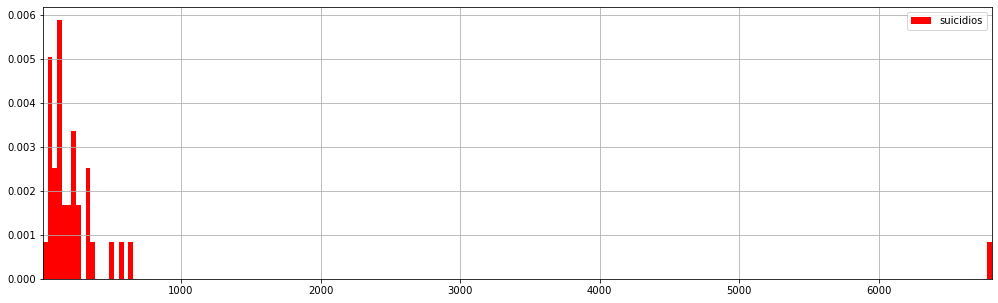

In [7]:
suic = pd.DataFrame({'Numero muertes': (suicidios['2017'].append(suicidios["2018"]).append(suicidios["2019"]))})
list_acc=list(suicidios.iloc[:,1])
x=list(filter(lambda num: num != 0, list_acc))

bins=200
plt.figure(figsize=(17,5))
plt.hist(x, bins, density= True, label= "suicidios", color='red')
plt.xlim((min(list_acc),max(list_acc)))
plt.legend(loc="best")
plt.grid()
plt.show()

## DISTRIBUCIÓN PARA SUICIDIOS

In [8]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""

    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0


    DISTRIBUTIONS = [
    st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
    st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]


    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    #Estimamos parametros
    for distribution in DISTRIBUTIONS:

    # aplicamos la funcion fit a los datos
        try:

            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                params = distribution.fit(data)

                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))


                # Verificamos si le queda mejor la distribucion a los datos
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

best_fit_distribution(suicidios['Total'])

('norm', (0.0, 1.0))

Tenemos que el mejor ajuste para nuestros datos es una distribución normal con los parametros media cero y varianza 1

## PRUEBA QUANTIL QUANTIL

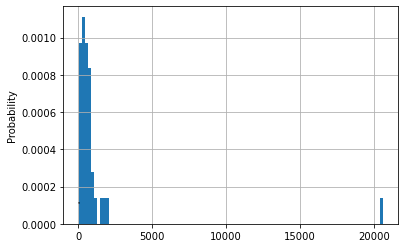

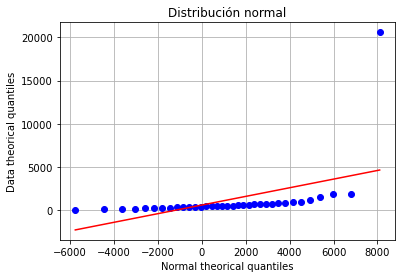

In [9]:
para1=st.norm.fit(suicidios['Total'])
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(suicidios['Total'], divisiones, density=True,label='Suicidios')
x = np.arange(18,90,.01)
y = st.norm.pdf(x, loc=para1[0], scale=para1[1])
plt.plot(x, y, 'k--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# Gráfica de Q-Q entre las muestras creadas y una curva normal
st.probplot(suicidios['Total'], (para1[0],para1[1]), dist='norm', plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

## CHI CUADRADA

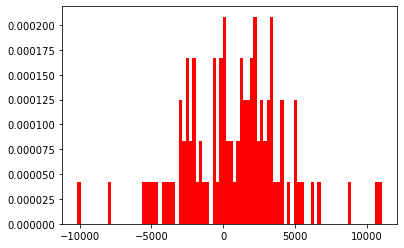

media mu =306.149275, desviación estándar muestral =6107.475073


In [10]:
mu_real = u_suic; sigma_real = devest_suic
N = 34*3 # Cantidad de muestras
n1 = np.random.normal(mu_real, sigma_real, N)
J = 90  # Cantidad de particiones del histograma
[freq, x, _] = plt.hist(n1, J, density=True, color='red')
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

# <span style="background-color: green">NODO DE MORTALIDAD

## Media y desviación estandar

In [11]:
u_mort = mort['Total'].mean()

devest_mort=mort['Total'].std()

print('Media de mortalidad:', u_mort,'Desviación estd. mortalidad:', devest_mort)


Media de mortalidad: 124196.68571428572 Desviación estd. mortalidad: 360756.4536161375


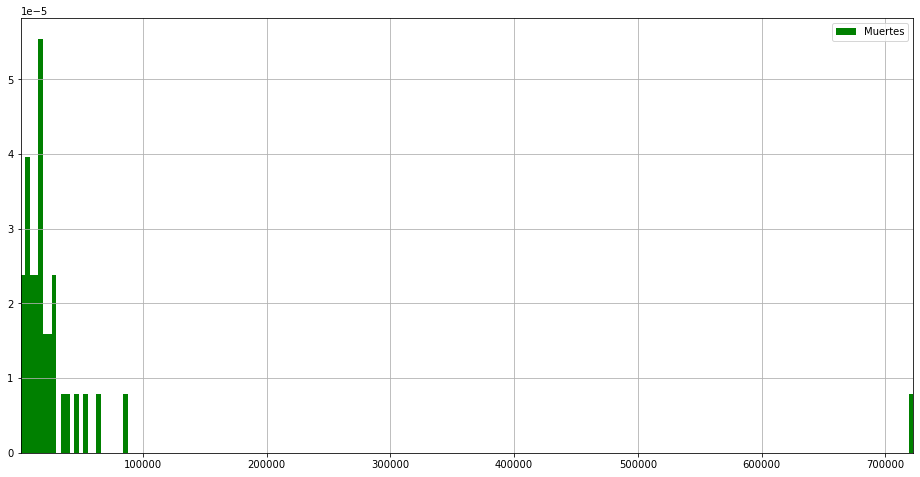

In [12]:
morts = pd.DataFrame({'Numero muertes': (mort['2017'].append(mort["2018"]).append(mort["2019"]))})
# morts = pd.DataFrame({'Numero muertes': mort['Total']})
list_acc_m=list(mort.iloc[:,1])
xmort=list(filter(lambda num: num != 0, list_acc_m))

bins=200
plt.figure(figsize=(16,8))
plt.hist(xmort, bins, density= True, label= "Muertes", color='green')
plt.xlim((min(list_acc_m)-20,max(list_acc_m)+20))
plt.legend(loc="best")
plt.grid()
plt.show()

## DISTRIBUCIÓN PARA MORTALIDAD

In [13]:
best_fit_distribution(mort['Total'])

('norm', (0.0, 1.0))

Tenemos que el mejor ajuste para nuestros datos es una distribución normal con los parametros media cero y varianza 1

## PRUEBA QUANTIL QUANTIL

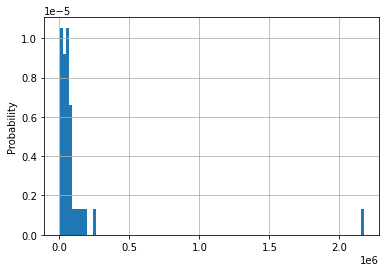

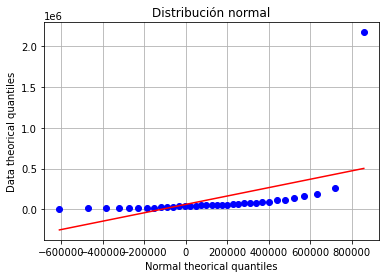

In [14]:
para2=st.norm.fit(mort['Total'])
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(mort['Total'], divisiones, density=True,label='Mortalidad')
x = np.arange(18,90,.01)
y2 = st.norm.pdf(x, loc=para2[0], scale=para2[1])
plt.plot(x, y2, 'k--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# Gráfica de Q-Q entre las muestras creadas y una curva normal
st.probplot(mort['Total'], (para2[0],para2[1]), dist='norm', plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

## CHI CUADRADA

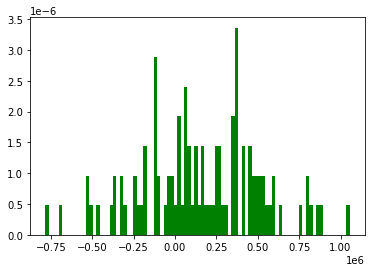

media mu =126360.065238, desviación estándar muestral =530644.568148


In [15]:
mu_real_m = u_mort; sigma_real_m = devest_mort
N = 34*3 # Cantidad de muestras
n2 = np.random.normal(mu_real_m, sigma_real_m, N)
J = 90  # Cantidad de particiones del histograma
[freq, x, _] = plt.hist(n2, J, density=True, color='green')
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_m = x[:-1] 

# Media y desviación estándar muestral
mu_m = np.mean(x_m)
sigma_m = np.std(x_m)
print('media mu =%f, desviación estándar muestral =%f'%(mu_m,sigma_m))

# <span style="background-color: purple">NODO CAUSAS SUICIDIO</span>


In [16]:
u_causas = (causas['Total']).mean()

devest_causas=(causas['Total']).std()

print('Media de mortalidad:', u_causas,'Desviación estd. mortalidad:', devest_causas)


Media de mortalidad: 6511.6 Desviación estd. mortalidad: 7343.12306174968


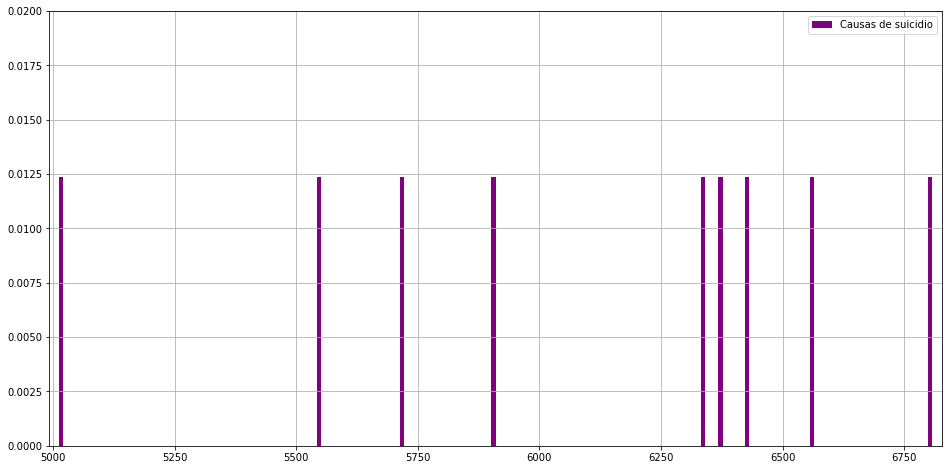

In [17]:
# cause = pd.DataFrame({'causas de suicidio': (causas['2010'].append(causas["2011"]).append(causas["2012"]).append(causas["2013"]).append\
#                                               (causas["2014"]).append(causas["2015"]).append(causas["2016"]).append(causas["2017"]))})
cause = pd.DataFrame({'causas de suicidio': (causas.iloc[4,:-1].append(causas.iloc[1,:-1]).append(causas.iloc[2,:-1]).append(causas.iloc[3,:-1]))})


list_acc_c=list(causas.iloc[0,:-1])
xcausas = list(filter(lambda num: num != 0, list_acc_c))

bins=200
plt.figure(figsize=(16,8))
plt.hist(xcausas, bins, density= True, label= "Causas de suicidio", color='purple')
plt.ylim(0,.02)
plt.xlim((min(list_acc_c)-20,max(list_acc_c)+20))
plt.legend(loc="best")
plt.grid()
plt.show()

## DISTRIBUCIÓN PARA CAUSA DE SUICIDIOS

In [18]:
best_fit_distribution((causas['Total']))

('norm', (0.0, 1.0))

Tenemos que el mejor ajuste para nuestros datos es una distribución normal con los parametros media cero y varianza 1

## PRUEBA QUANTIL QUANTIL

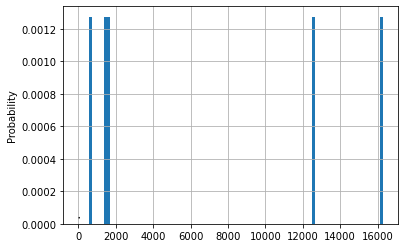

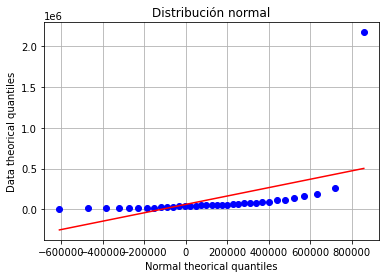

In [19]:
para3=st.norm.fit(causas['Total'])
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(causas['Total'], divisiones, density=True,label='Causas')
x = np.arange(18,90,.01)
y3 = st.norm.pdf(x, loc=para3[0], scale=para3[1])
plt.plot(x, y3, 'k--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# Gráfica de Q-Q entre las muestras creadas y una curva normal
st.probplot(mort['Total'], (para2[0],para2[1]), dist='norm', plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

## CHI CUADRADA

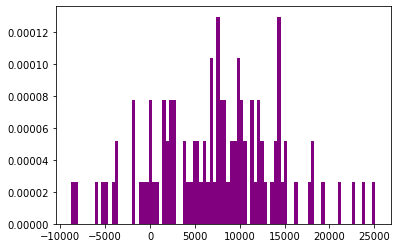

media mu =7959.099210, desviación estándar muestral =9803.821404


In [20]:
mu_real_c = u_causas; sigma_real_c = devest_causas
N = 34*3 # Cantidad de muestras
n3 = np.random.normal(mu_real_c, sigma_real_c, N)
J = 90  # Cantidad de particiones del histograma
[freq, x, _] = plt.hist(n3, J, density=True, color='purple')
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x[:-1] 

# Media y desviación estándar muestral
mu_c = np.mean(x_c)
sigma_c = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu_c,sigma_c))

# <span style="background-color: orange">NODO EDAD SUICIDIO</span>


In [21]:
u_edad = (edad['Total']).mean()

devest_edad=(edad['Total']).std()

print('Media de edad:', u_edad,'Desviación estd. edada:', devest_edad)


Media de edad: 2504.4615384615386 Desviación estd. edada: 4201.235465419361


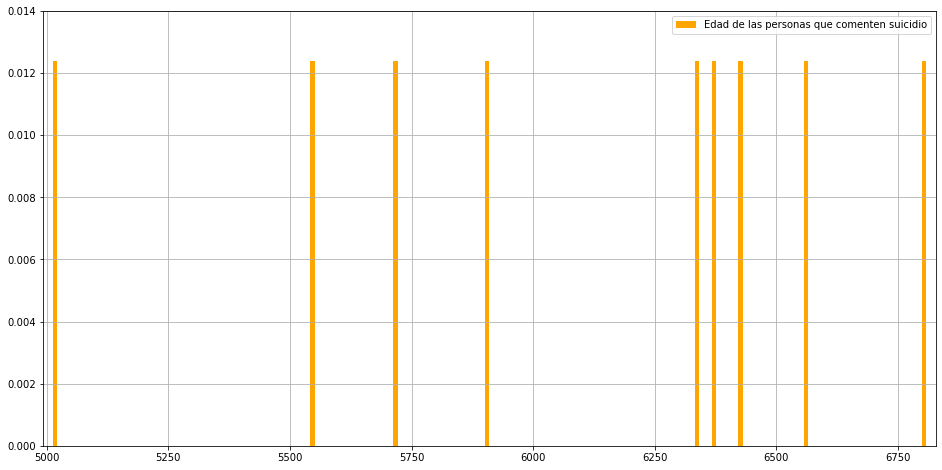

In [22]:
age = pd.DataFrame({'Edad de suicidio': (edad['2010'].append(edad["2011"]).append(edad["2012"]).append(edad["2013"]).append  \
                                        (edad["2014"]).append(edad["2015"]).append(edad["2016"]).append(edad["2017"]))})

list_acc_e=list(edad.iloc[0,:-1])
xedad = list(filter(lambda num: num != 0, list_acc_e))

bins=200
plt.figure(figsize=(16,8))
plt.hist(xedad, bins, density= True, label= "Edad de las personas que comenten suicidio", color='orange')
plt.ylim(0,.014)
plt.xlim((min(list_acc_e)-20,max(list_acc_e)+20))
plt.legend(loc="best")
plt.grid()
plt.show()

## DISTRIBUCIÓN PARA SUICIDIOS

In [23]:
best_fit_distribution((edad['Total']))

('norm', (0.0, 1.0))

Tenemos que el mejor ajuste para nuestros datos es una distribución normal con los parametros media cero y varianza 1

## PRUEBA QUANTIL QUANTIL

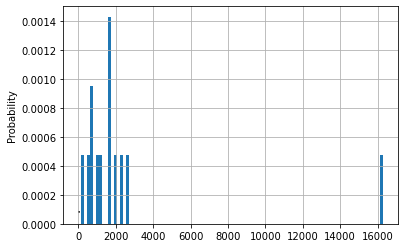

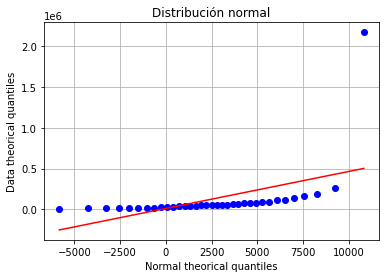

In [24]:
para4=st.norm.fit(edad['Total'])
# Histograma de las variables creadas

divisiones = 100 # Cantidad de barras en el histograma
plt.hist(edad['Total'], divisiones, density=True,label='Edad')
x = np.arange(18,90,.01)
y4 = st.norm.pdf(x, loc=para4[0], scale=para4[1])
plt.plot(x, y4, 'k--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# Gráfica de Q-Q entre las muestras creadas y una curva normal
st.probplot(mort['Total'], (para4[0],para4[1]), dist='norm', plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

## CHI CUADRADA

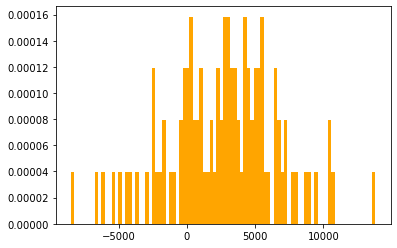

media mu =2524.203814, desviación estándar muestral =6433.879573


In [25]:
mu_real_e = u_edad; sigma_real_e = devest_edad
N = 34*3 # Cantidad de muestras
n4 = np.random.normal(mu_real_e, sigma_real_e, N)
J = 90  # Cantidad de particiones del histograma
[freq, x, _] = plt.hist(n4, J, density=True, color='orange')
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_e = x[:-1] 

# Media y desviación estándar muestral
mu_e = np.mean(x_e)
sigma_e = np.std(x_e)
print('media mu =%f, desviación estándar muestral =%f'%(mu_e,sigma_e))